In [150]:
import numpy as np
import pandas as pd
pd.set_option('max_colwidth',80)

import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [151]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [152]:
stopwords_eng = stopwords.words('english')

# Import Data

In [153]:
tweets_df = pd.read_csv('Data/sentiments_for_us_tweets.csv')
tweets_df.drop(tweets_df.columns[0], axis=1, inplace=True)

In [154]:
tweets_df.head()

,geo,text,user,location,Subject,state,Polarity,Sentiment
0,NaN,After the confrontation that cost Walter Wallace Jr. his life set off prote...,wheresestela1,New Jersey,Donald Trump,New Jersey,"{'neg': 0.448, 'neu': 0.552, 'pos': 0.0, 'compound': -0.743}",Negative
1,NaN,"""COVID-19 is still raging. Trump is still lying.""",TheFemaleYungin,"The Wrong Address, Texas",Donald Trump,Texas,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",Neutral
2,NaN,"Donald Trump Jr.: ""Why aren't they talking about deaths? Oh, oh, because th...",KathrynTomashu1,"Northborough, MA",Donald Trump,Massachusetts,"{'neg': 0.275, 'neu': 0.634, 'pos': 0.092, 'compound': -0.5574}",Negative
3,NaN,Let’s not forget who created these problems. Tell Donald Trump his scheme to...,ajserino,"New Jersey, USA",Donald Trump,New Jersey,"{'neg': 0.279, 'neu': 0.545, 'pos': 0.176, 'compound': -0.1779}",Negative
4,NaN,There is no greater supporter of Donald Trump in the world than Mark Zucker...,SpeakBravely,"Twin Cities, Minnesota",Donald Trump,Minnesota,"{'neg': 0.0, 'neu': 0.606, 'pos': 0.394, 'compound': 0.6369}",Positive


# NLTK text preprocess

In [155]:
def clean_tweet(tweet):
    tweet = re.sub('RT','',tweet)
    tweet = re.sub('@[\w]*','',tweet)
    tweet = re.sub('#[\w]*','',tweet)
    tweet = re.sub('https?://[A-Za-z0-9./]*','',tweet)
    tweet = re.sub('\n','',tweet)
    return tweet

In [156]:
# lemmatization function
lemmatizer = WordNetLemmatizer()
def lemmatize_tweet(tweet):
    lemmatized_tweet = []
    for word in tweet:
        lemmatized_tweet.append(lemmatizer.lemmatize(word, pos='v'))
    return lemmatized_tweet

# stemming function
porter = PorterStemmer()
def stem_tweet(tweet):
    stemmed_tweet = []
    for word in tweet:
        stemmed_tweet.append(porter.stem(word))
    return stemmed_tweet


# remove stopwords function
def remove_stopwords(tweet):
    tweet_witout_stops = []
    for word in tweet:
        if word not in stopwords_eng:
            tweet_witout_stops.append(word)
    return tweet_witout_stops

In [157]:
tweets_df['cleaned_text'] = tweets_df['text'].apply(clean_tweet)

In [158]:
# make all text lowercase
tweets_df['cleaned_text'] = tweets_df['cleaned_text'].apply(lambda x: x.lower())

In [159]:
# remove punctuations and numbers and emoji
tweets_df['cleaned_text'] = tweets_df['cleaned_text'].str.replace("[^a-zA-z]", " ")

<ipython-input-159-7b644cf159d7>:2: FutureWarning:

The default value of regex will change from True to False in a future version.



In [160]:
#tokenize text
tweets_df['tokenized_text'] = tweets_df['cleaned_text'].apply(lambda x: word_tokenize(x))

In [161]:
#remove stopwords
tweets_df['tokenized_text'] = tweets_df['tokenized_text'].apply(remove_stopwords)

In [162]:
#lemmatize text
tweets_df['lemmatized_text'] = tweets_df['tokenized_text']. apply(lemmatize_tweet)

In [163]:
#stem text
tweets_df['stemmed_text'] = tweets_df['lemmatized_text'].apply(stem_tweet)

In [164]:
#de tokenize text
tweets_df['lemmatized_string'] = tweets_df['lemmatized_text'].apply(lambda x: ' '.join(x))
tweets_df['stemmed_string'] = tweets_df['stemmed_text'].apply(lambda x: ' '.join(x))

In [165]:
tweets_df.head()

,geo,text,user,location,Subject,state,Polarity,Sentiment,cleaned_text,tokenized_text,lemmatized_text,stemmed_text,lemmatized_string,stemmed_string
0,NaN,After the confrontation that cost Walter Wallace Jr. his life set off prote...,wheresestela1,New Jersey,Donald Trump,New Jersey,"{'neg': 0.448, 'neu': 0.552, 'pos': 0.0, 'compound': -0.743}",Negative,after the confrontation that cost walter wallace jr his life set off prote...,"[confrontation, cost, walter, wallace, jr, life, set, protests, devolved, ri...","[confrontation, cost, walter, wallace, jr, life, set, protest, devolve, riot...","[confront, cost, walter, wallac, jr, life, set, protest, devolv, riot, loot,...",confrontation cost walter wallace jr life set protest devolve riot loot lead,confront cost walter wallac jr life set protest devolv riot loot lead
1,NaN,"""COVID-19 is still raging. Trump is still lying.""",TheFemaleYungin,"The Wrong Address, Texas",Donald Trump,Texas,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",Neutral,covid is still raging trump is still lying,"[covid, still, raging, trump, still, lying]","[covid, still, rag, trump, still, lie]","[covid, still, rag, trump, still, lie]",covid still rag trump still lie,covid still rag trump still lie
2,NaN,"Donald Trump Jr.: ""Why aren't they talking about deaths? Oh, oh, because th...",KathrynTomashu1,"Northborough, MA",Donald Trump,Massachusetts,"{'neg': 0.275, 'neu': 0.634, 'pos': 0.092, 'compound': -0.5574}",Negative,donald trump jr why aren t they talking about deaths oh oh because th...,"[donald, trump, jr, talking, deaths, oh, oh, number, almost, nothing, gott]","[donald, trump, jr, talk, deaths, oh, oh, number, almost, nothing, gott]","[donald, trump, jr, talk, death, oh, oh, number, almost, noth, gott]",donald trump jr talk deaths oh oh number almost nothing gott,donald trump jr talk death oh oh number almost noth gott
3,NaN,Let’s not forget who created these problems. Tell Donald Trump his scheme to...,ajserino,"New Jersey, USA",Donald Trump,New Jersey,"{'neg': 0.279, 'neu': 0.545, 'pos': 0.176, 'compound': -0.1779}",Negative,let s not forget who created these problems tell donald trump his scheme to...,"[let, forget, created, problems, tell, donald, trump, scheme, undermine, rig...","[let, forget, create, problems, tell, donald, trump, scheme, undermine, righ...","[let, forget, creat, problem, tell, donald, trump, scheme, undermin, right, ...",let forget create problems tell donald trump scheme undermine right vote safely,let forget creat problem tell donald trump scheme undermin right vote safe
4,NaN,There is no greater supporter of Donald Trump in the world than Mark Zucker...,SpeakBravely,"Twin Cities, Minnesota",Donald Trump,Minnesota,"{'neg': 0.0, 'neu': 0.606, 'pos': 0.394, 'compound': 0.6369}",Positive,there is no greater supporter of donald trump in the world than mark zucker...,"[greater, supporter, donald, trump, world, mark, zuckerberg, one, done, elect]","[greater, supporter, donald, trump, world, mark, zuckerberg, one, do, elect]","[greater, support, donald, trump, world, mark, zuckerberg, one, do, elect]",greater supporter donald trump world mark zuckerberg one do elect,greater support donald trump world mark zuckerberg one do elect


In [166]:
tweets_df['Sentiment'].value_counts()

Neutral     2029
Negative    1977
Positive    1547
Name: Sentiment, dtype: int64

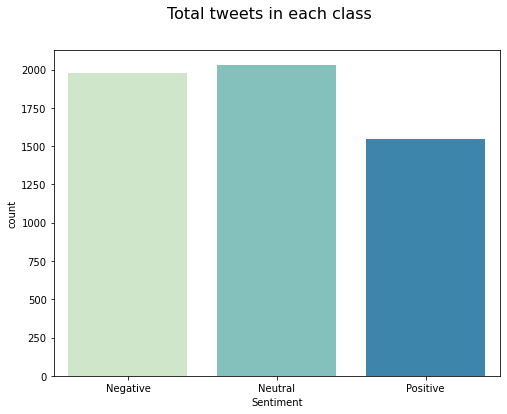

In [167]:
fig = plt.figure(figsize=(8,6))
sns.countplot(x='Sentiment', data=tweets_df, palette='GnBu')
fig.suptitle('Total tweets in each class', fontsize=16)
fig.savefig('Plots/classes.png')

# Text classification

### Split the dataset into train and test 

In [168]:
from sklearn.model_selection import train_test_split

In [169]:
X = tweets_df['lemmatized_string']
y = tweets_df['Sentiment']

In [170]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [171]:
model_scores =[]

#### Import Pipeline and metrics libraries

In [172]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

# metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import plot_confusion_matrix

## Dummy Classifier

In [173]:
from sklearn.dummy import DummyClassifier

In [174]:
dummy_clf = Pipeline([('tfidf', TfidfVectorizer()), ('clf', DummyClassifier(strategy="most_frequent"))])

In [175]:
dummy_clf.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('clf', DummyClassifier(strategy='most_frequent'))])

In [176]:
predictions = dummy_clf.predict(X_test)

In [177]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00       602
     Neutral       0.37      1.00      0.54       617
    Positive       0.00      0.00      0.00       447

    accuracy                           0.37      1666
   macro avg       0.12      0.33      0.18      1666
weighted avg       0.14      0.37      0.20      1666



c:\users\user\documents\twittersentimentanalysis\env\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\users\user\documents\twittersentimentanalysis\env\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\users\user\documents\twittersentimentanalysis\env\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [178]:
print(f1_score(y_test,predictions,average='macro'))

0.18017228792524456


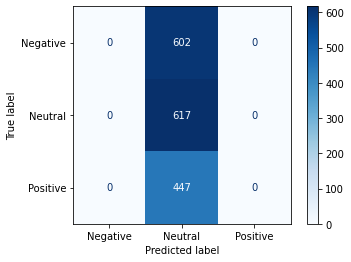

In [179]:
plot_confusion_matrix(dummy_clf, X_test, y_test, cmap='Blues')

## Naive Bayes

In [180]:
from sklearn.naive_bayes import MultinomialNB

text_clf_nb = Pipeline([('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [181]:
text_clf_nb.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [182]:
predictions = text_clf_nb.predict(X_test)

In [183]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

    Negative       0.91      0.89      0.90       602
     Neutral       0.86      0.90      0.88       617
    Positive       0.88      0.85      0.86       447

    accuracy                           0.89      1666
   macro avg       0.89      0.88      0.88      1666
weighted avg       0.89      0.89      0.89      1666



In [184]:
print(f1_score(y_test,predictions,average='macro'))

0.8835834482688251


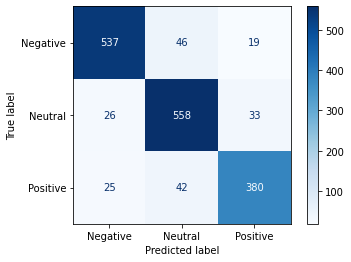

In [185]:
plot_confusion_matrix(text_clf_nb, X_test, y_test, cmap='Blues')
plt.savefig('Plots/naive_bayes.png')

In [186]:
model_scores.append(f1_score(y_test,predictions,average='macro'))

## Support Vector Machines - SVM

In [187]:
from sklearn.svm import SVC

text_clf_lsvc = Pipeline([('tfidf', TfidfVectorizer()), ('clf', SVC())])

In [188]:
text_clf_lsvc.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', SVC())])

In [189]:
predictions = text_clf_lsvc.predict(X_test)

In [190]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

    Negative       0.95      0.89      0.92       602
     Neutral       0.85      0.96      0.91       617
    Positive       0.95      0.86      0.91       447

    accuracy                           0.91      1666
   macro avg       0.92      0.91      0.91      1666
weighted avg       0.92      0.91      0.91      1666



In [191]:
print(f1_score(y_test,predictions,average='macro'))

0.9103397916627007


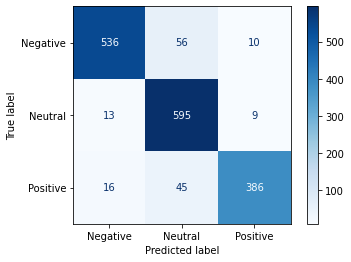

In [192]:
plot_confusion_matrix(text_clf_lsvc, X_test, y_test, cmap='Blues')
plt.savefig('Plots/SVC.png')

In [193]:
model_scores.append(f1_score(y_test,predictions,average='macro'))

## Decision tree

In [194]:
from sklearn.tree import DecisionTreeClassifier

text_clf_tree = Pipeline([('tfidf', TfidfVectorizer()), ('clf', DecisionTreeClassifier())])

In [195]:
text_clf_tree.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('clf', DecisionTreeClassifier())])

In [196]:
predictions = text_clf_tree.predict(X_test)

In [197]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

    Negative       0.92      0.89      0.90       602
     Neutral       0.85      0.92      0.88       617
    Positive       0.92      0.85      0.88       447

    accuracy                           0.89      1666
   macro avg       0.90      0.89      0.89      1666
weighted avg       0.89      0.89      0.89      1666



In [198]:
print(f1_score(y_test,predictions,average='macro'))

0.8897527987490769


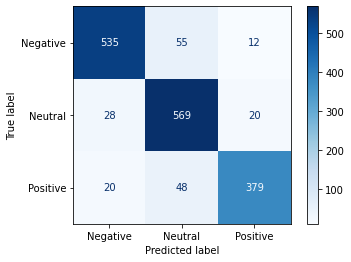

In [199]:
plot_confusion_matrix(text_clf_tree, X_test, y_test, cmap='Blues')
plt.savefig('Plots/decision_trees.png')

In [200]:
model_scores.append(f1_score(y_test,predictions,average='macro'))

## K Nearest Neighors

In [201]:
from sklearn.neighbors import KNeighborsClassifier

text_clf_knn = Pipeline([('tfidf', TfidfVectorizer()), ('clf', KNeighborsClassifier())])

In [202]:
text_clf_knn.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', KNeighborsClassifier())])

In [203]:
predictions = text_clf_knn.predict(X_test)

In [204]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

    Negative       0.96      0.80      0.88       602
     Neutral       0.73      0.97      0.83       617
    Positive       0.96      0.72      0.82       447

    accuracy                           0.84      1666
   macro avg       0.88      0.83      0.84      1666
weighted avg       0.87      0.84      0.85      1666



In [205]:
print(f1_score(y_test,predictions,average='macro'))

0.843637002439016


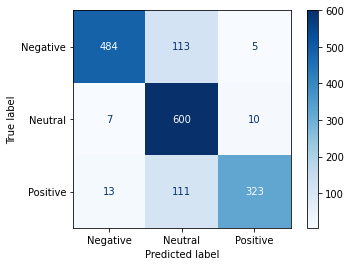

In [206]:
plot_confusion_matrix(text_clf_knn, X_test, y_test, cmap='Blues')
plt.savefig('Plots/knn.png')

In [207]:
model_scores.append(f1_score(y_test,predictions,average='macro'))

# Ensemble models

### Random Forest

In [208]:
from sklearn.ensemble import RandomForestClassifier

text_clf_randfo = Pipeline([('tfidf', TfidfVectorizer()), ('clf', RandomForestClassifier())])

In [209]:
text_clf_randfo.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('clf', RandomForestClassifier())])

In [210]:
predictions = text_clf_randfo.predict(X_test)

In [211]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

    Negative       0.98      0.86      0.91       602
     Neutral       0.81      0.98      0.89       617
    Positive       0.95      0.83      0.89       447

    accuracy                           0.90      1666
   macro avg       0.91      0.89      0.90      1666
weighted avg       0.91      0.90      0.90      1666



In [212]:
print(f1_score(y_test,predictions,average='macro'))

0.8964988384950298


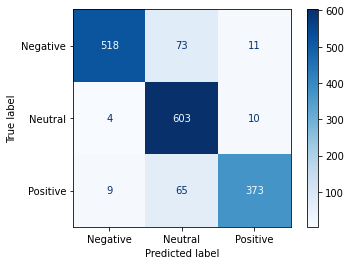

In [213]:
plot_confusion_matrix(text_clf_randfo, X_test, y_test, cmap='Blues')
plt.savefig('Plots/random_forests.png')

In [214]:
model_scores.append(f1_score(y_test,predictions,average='macro'))

### Adaboost

In [215]:
from sklearn.ensemble import AdaBoostClassifier

text_clf_ada = Pipeline([('tfidf', TfidfVectorizer()), ('clf', AdaBoostClassifier())])

In [216]:
text_clf_ada.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', AdaBoostClassifier())])

In [217]:
predictions = text_clf_ada.predict(X_test)

In [218]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

    Negative       0.96      0.66      0.79       602
     Neutral       0.68      0.97      0.80       617
    Positive       0.93      0.76      0.84       447

    accuracy                           0.80      1666
   macro avg       0.86      0.80      0.81      1666
weighted avg       0.85      0.80      0.80      1666



In [219]:
print(f1_score(y_test,predictions,average='macro'))

0.8062145748015587


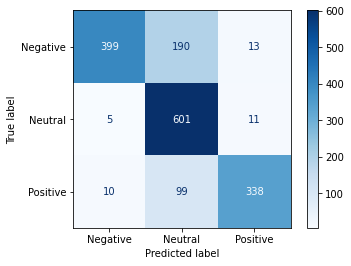

In [220]:
plot_confusion_matrix(text_clf_ada, X_test, y_test, cmap='Blues')
plt.savefig('Plots/adaboost.png')

In [221]:
model_scores.append(f1_score(y_test,predictions,average='macro'))

# Models F1 Score

In [222]:
names = ['Multinomial Naive Bayes', 'SVC', 'Decision Trees', 'KNN', 'Random Forests', 'Adaboost']
models_scores = pd.DataFrame(zip(names,model_scores), columns=['Model Name', 'F1 Score (macro)'])

In [223]:
models_scores

,Model Name,F1 Score (macro)
0,Multinomial Naive Bayes,0.883583
1,SVC,0.910340
2,Decision Trees,0.889753
3,KNN,0.843637
4,Random Forests,0.896499
5,Adaboost,0.806215


# Hypertune parameters with GridSearchCV

### SVM

In [224]:
from sklearn.model_selection import GridSearchCV

In [225]:
param_grid = {'clf__kernel':['linear', 'rbf'],
             'clf__C':[0.01,0.1,1,10],
             'clf__class_weight':['none', 'balanced']}

text_clf_svc = Pipeline([('tfidf', TfidfVectorizer()), ('clf', SVC(random_state=42))])
grid_search_svm = GridSearchCV(text_clf_svc, param_grid, cv=5, scoring='f1_macro')

grid_search_svm.fit(X_train,y_train)

print("Best estimator is: "+str(grid_search_svm.best_params_))
print("F1-Score (macro avg) on train: "+"{0:.2%}".format(grid_search_svm.best_score_))

c:\users\user\documents\twittersentimentanalysis\env\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\user\documents\twittersentimentanalysis\env\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\user\documents\twittersentimentanalysis\env\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "c:\users\user\documents\twittersentimentanalysis\env\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "c:\users\user\documents\twittersentimentanalysis\env\lib\site-packages\sklearn\svm\_base.py", line 555, in _validate_targets
    self.class_weight_ = compute_class_weight(self.class

c:\users\user\documents\twittersentimentanalysis\env\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\user\documents\twittersentimentanalysis\env\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\user\documents\twittersentimentanalysis\env\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "c:\users\user\documents\twittersentimentanalysis\env\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "c:\users\user\documents\twittersentimentanalysis\env\lib\site-packages\sklearn\svm\_base.py", line 555, in _validate_targets
    self.class_weight_ = compute_class_weight(self.class

c:\users\user\documents\twittersentimentanalysis\env\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\user\documents\twittersentimentanalysis\env\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\user\documents\twittersentimentanalysis\env\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "c:\users\user\documents\twittersentimentanalysis\env\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "c:\users\user\documents\twittersentimentanalysis\env\lib\site-packages\sklearn\svm\_base.py", line 555, in _validate_targets
    self.class_weight_ = compute_class_weight(self.class

c:\users\user\documents\twittersentimentanalysis\env\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\user\documents\twittersentimentanalysis\env\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\user\documents\twittersentimentanalysis\env\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "c:\users\user\documents\twittersentimentanalysis\env\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "c:\users\user\documents\twittersentimentanalysis\env\lib\site-packages\sklearn\svm\_base.py", line 555, in _validate_targets
    self.class_weight_ = compute_class_weight(self.class

c:\users\user\documents\twittersentimentanalysis\env\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\user\documents\twittersentimentanalysis\env\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\user\documents\twittersentimentanalysis\env\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "c:\users\user\documents\twittersentimentanalysis\env\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "c:\users\user\documents\twittersentimentanalysis\env\lib\site-packages\sklearn\svm\_base.py", line 555, in _validate_targets
    self.class_weight_ = compute_class_weight(self.class

c:\users\user\documents\twittersentimentanalysis\env\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\user\documents\twittersentimentanalysis\env\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\user\documents\twittersentimentanalysis\env\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "c:\users\user\documents\twittersentimentanalysis\env\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "c:\users\user\documents\twittersentimentanalysis\env\lib\site-packages\sklearn\svm\_base.py", line 555, in _validate_targets
    self.class_weight_ = compute_class_weight(self.class

c:\users\user\documents\twittersentimentanalysis\env\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning:

One or more of the test scores are non-finite: [       nan        nan 0.59490109 0.47213922        nan        nan
 0.82793337 0.80504014        nan        nan 0.90644432 0.89910401
        nan        nan 0.91262951 0.9068715 ]



Best estimator is: {'clf__C': 10, 'clf__class_weight': 'balanced', 'clf__kernel': 'linear'}
F1-Score (macro avg) on train: 91.26%


In [226]:
predictions = grid_search_svm.best_estimator_.predict(X_test)

In [227]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

    Negative       0.93      0.93      0.93       602
     Neutral       0.91      0.94      0.93       617
    Positive       0.94      0.90      0.92       447

    accuracy                           0.93      1666
   macro avg       0.93      0.92      0.93      1666
weighted avg       0.93      0.93      0.93      1666



In [228]:
print(f1_score(y_test,predictions,average='macro'))

0.9250835199565678


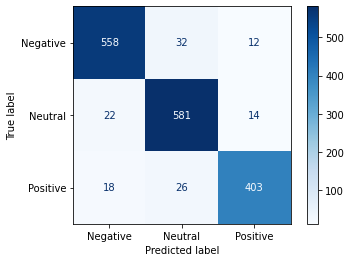

In [229]:
plot_confusion_matrix(grid_search_svm.best_estimator_, X_test, y_test, cmap='Blues')
plt.savefig('Plots/svm_hypertuned')

### Random Forest

In [230]:
param_grid = {'clf__n_estimators':[50,100,150,200],
             'clf__max_features':[2,5,10,15],
              'clf__max_depth':[50,100,150,200]}

text_clf_randfo = Pipeline([('tfidf', TfidfVectorizer()), ('clf', RandomForestClassifier(random_state=42))])
grid_search_randfo = GridSearchCV(text_clf_randfo,param_grid,cv=5,scoring='f1_macro')

grid_search_randfo.fit(X_train,y_train)

print("Best estimator is: "+str(grid_search_randfo.best_params_))
print("F1-Score (macro avg) on train: "+"{0:.2%}".format(grid_search_randfo.best_score_))

Best estimator is: {'clf__max_depth': 200, 'clf__max_features': 15, 'clf__n_estimators': 200}
F1-Score (macro avg) on train: 89.60%


In [231]:
predictions = grid_search_randfo.best_estimator_.predict(X_test)

In [232]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

    Negative       0.97      0.87      0.91       602
     Neutral       0.83      0.98      0.90       617
    Positive       0.96      0.86      0.91       447

    accuracy                           0.91      1666
   macro avg       0.92      0.90      0.91      1666
weighted avg       0.91      0.91      0.91      1666



In [233]:
print(f1_score(y_test,predictions,average='macro'))

0.9056722978830725


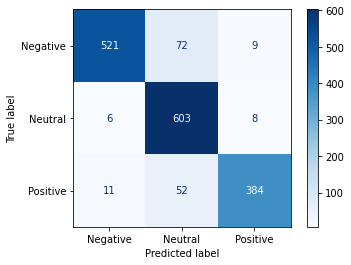

In [234]:
plot_confusion_matrix(grid_search_randfo.best_estimator_, X_test, y_test, cmap='Blues')
plt.savefig('Plots/random_forests_hypertuned')

# Predict elections on new data

In [235]:
trump_df = pd.read_csv('Data/hashtag_donaldtrump.csv', lineterminator='\n')
biden_df = pd.read_csv('Data/hashtag_joebiden.csv', lineterminator='\n')

In [236]:
trump_df = trump_df.drop(columns=['tweet_id','user_id','user_name','user_screen_name','user_description','user_join_date','collected_at'])
biden_df = biden_df.drop(columns=['tweet_id','user_id','user_name','user_screen_name','user_description','user_join_date','collected_at'])

In [237]:
trump_df['country'].replace({"United States of America":"United States"}, inplace=True)
biden_df['country'].replace({"United States of America":"United States"}, inplace=True)

In [238]:
trump_df = trump_df.loc[trump_df['country'] == "United States"]
biden_df = biden_df.loc[biden_df['country'] == "United States"]

In [239]:
trump_df = trump_df.dropna()
biden_df = biden_df.dropna()

In [240]:
trump_df.loc[:,'subject'] = 'Donald Trump'
biden_df.loc[:,'subject'] = 'Joe Biden'

In [241]:
trump_df = trump_df[(trump_df['state'] != 'District of Columbia') & (trump_df['state'] != 'Puerto Rico')]
biden_df = biden_df[(biden_df['state'] != 'District of Columbia') & (biden_df['state'] != 'Puerto Rico')]

In [242]:
trump_df['created_at'] = pd.to_datetime(trump_df['created_at'], format='%Y-%m-%d %H:%M:%S')
biden_df['created_at'] = pd.to_datetime(biden_df['created_at'], format='%Y-%m-%d %H:%M:%S')

In [243]:
trump_df = trump_df[trump_df['created_at'] < "2020-11-3 00:00:00"]
biden_df = biden_df[biden_df['created_at'] < "2020-11-3 00:00:00"]

In [244]:
trump_df['cleaned_text'] = trump_df['tweet'].apply(clean_tweet)
biden_df['cleaned_text'] = biden_df['tweet'].apply(clean_tweet)

In [245]:
# make all text lowercase
trump_df['cleaned_text'] = trump_df['cleaned_text'].apply(lambda x: x.lower())
biden_df['cleaned_text'] = biden_df['cleaned_text'].apply(lambda x: x.lower())

In [246]:
# remove punctuations and numbers and emoji
trump_df['cleaned_text'] = trump_df['cleaned_text'].str.replace("[^a-zA-z]", " ")
biden_df['cleaned_text'] = biden_df['cleaned_text'].str.replace("[^a-zA-z]", " ")

<ipython-input-246-e8f7946ad7f5>:2: FutureWarning:

The default value of regex will change from True to False in a future version.

<ipython-input-246-e8f7946ad7f5>:3: FutureWarning:

The default value of regex will change from True to False in a future version.



In [247]:
#tokenize text
trump_df['tokenized_text'] = trump_df['cleaned_text'].apply(lambda x: word_tokenize(x))
biden_df['tokenized_text'] = biden_df['cleaned_text'].apply(lambda x: word_tokenize(x))

In [248]:
#remove stopwords
trump_df['tokenized_text'] = trump_df['tokenized_text'].apply(remove_stopwords)
biden_df['tokenized_text'] = biden_df['tokenized_text'].apply(remove_stopwords)

In [249]:
#lemmatize text
trump_df['lemmatized_text'] = trump_df['tokenized_text']. apply(lemmatize_tweet)
biden_df['lemmatized_text'] = biden_df['tokenized_text']. apply(lemmatize_tweet)

In [250]:
#stem text
trump_df['stemmed_text'] = trump_df['lemmatized_text'].apply(stem_tweet)
biden_df['stemmed_text'] = biden_df['lemmatized_text'].apply(stem_tweet)

In [251]:
#de tokenize text
trump_df['lemmatized_string'] = trump_df['lemmatized_text'].apply(lambda x: ' '.join(x))
trump_df['stemmed_string'] = trump_df['stemmed_text'].apply(lambda x: ' '.join(x))

biden_df['lemmatized_string'] = biden_df['lemmatized_text'].apply(lambda x: ' '.join(x))
biden_df['stemmed_string'] = biden_df['stemmed_text'].apply(lambda x: ' '.join(x))

In [252]:
df = pd.concat([trump_df, biden_df])

In [253]:
df['Sentiment'] = grid_search_svm.best_estimator_.predict(df['lemmatized_string'])

In [254]:
positive_trump = len(df[(df['subject'] == 'Donald Trump') & (df['Sentiment'] == 'Positive')])
neutral_trump = len(df[(df['subject'] == 'Donald Trump') & (df['Sentiment'] == 'Neutral')])
negative_trump = len(df[(df['subject'] == 'Donald Trump') & (df['Sentiment'] == 'Negative')])

positive_biden = len(df[(df['subject'] == 'Joe Biden') & (df['Sentiment'] == 'Positive')])
neutral_biden = len(df[(df['subject'] == 'Joe Biden') & (df['Sentiment'] == 'Neutral')])
negative_biden = len(df[(df['subject'] == 'Joe Biden') & (df['Sentiment'] == 'Negative')])

In [255]:
myindex = ['Donald Trump', 'Joe Biden']
mycolumns = ['Positive', 'Neutral', 'Negative']
sentimet_df = pd.DataFrame(index=myindex, columns=mycolumns)

sentimet_df.at['Donald Trump', 'Positive'] = positive_trump
sentimet_df.at['Donald Trump', 'Neutral'] = neutral_trump
sentimet_df.at['Donald Trump', 'Negative'] = negative_trump

sentimet_df.at['Joe Biden', 'Positive'] = positive_biden
sentimet_df.at['Joe Biden', 'Neutral'] = neutral_biden
sentimet_df.at['Joe Biden', 'Negative'] = negative_biden

sentimet_df

,Positive,Neutral,Negative
Donald Trump,18094,19740,20489
Joe Biden,14325,18483,12699


In [256]:
labels = list(sentimet_df.index)
labels.append('Others')
percentage_trump = round(((positive_trump + negative_biden + neutral_trump*0.3)/len(df))*100, 2)
percentage_biden = round(((positive_biden + negative_trump + neutral_biden*0.3)/len(df))*100, 2)
percentage_others = round(100 - percentage_biden - percentage_trump, 2)
data = [percentage_trump, percentage_biden, percentage_others]

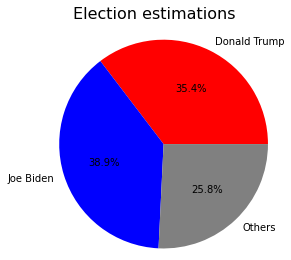

In [257]:
fig, axes = plt.subplots(figsize=(10,4))
axes.pie(data, labels=labels, autopct='%1.1f%%',radius=1.2,colors=['red','blue','gray'])
fig.suptitle("Election estimations",fontsize=16)
fig.savefig('Plots/estimations_with_hypertuned_model.png')

In [258]:
df['subject'].value_counts()

Donald Trump    58323
Joe Biden       45507
Name: subject, dtype: int64

In [270]:
df.head()

,created_at,tweet,likes,retweet_count,source,user_followers_count,user_location,lat,long,city,...,state,state_code,subject,cleaned_text,tokenized_text,lemmatized_text,stemmed_text,lemmatized_string,stemmed_string,Sentiment
2,2020-10-15 00:00:02,"#Trump: As a student I used to hear for years, for ten years, I heard China!...",2.0,1.0,Twitter Web App,1185.0,Portland,45.520247,-122.674195,Portland,...,Oregon,OR,Donald Trump,as a student i used to hear for years for ten years i heard china in ...,"[student, used, hear, years, ten, years, heard, china, know, many, asked, ma...","[student, use, hear, years, ten, years, hear, china, know, many, ask, many, ...","[student, use, hear, year, ten, year, hear, china, know, mani, ask, mani, sa...",student use hear years ten years hear china know many ask many say sir know ...,student use hear year ten year hear china know mani ask mani say sir know mi...,Positive
11,2020-10-15 00:00:25,"In 2020, #NYPost is being #censorship #CENSORED by Twitter to manipulate a U...",0.0,0.0,Twitter for iPhone,1396.0,"Chicago, Illinois",41.875562,-87.624421,Chicago,...,Illinois,IL,Donald Trump,in is being by twitter to manipulate a us election in favor of and...,"[twitter, manipulate, us, election, favor, ccp, porn, twitter, always, fine,...","[twitter, manipulate, us, election, favor, ccp, porn, twitter, always, fine,...","[twitter, manipul, us, elect, favor, ccp, porn, twitter, alway, fine, sick]",twitter manipulate us election favor ccp porn twitter always fine sick,twitter manipul us elect favor ccp porn twitter alway fine sick,Positive
12,2020-10-15 00:00:26,#Trump #PresidentTrump #Trump2020LandslideVictory #Trump2020 #MAGA #KAG #4Mo...,3.0,5.0,Twitter for Android,496.0,"San Diego, CA",32.717421,-117.162771,San Diego,...,California,CA,Donald Trump,,[],[],[],,,Neutral
22,2020-10-15 00:01:14,"#Trump: Nobody likes to tell you this, but some of the farmers were doing be...",1.0,1.0,Twitter Web App,1185.0,Portland,45.520247,-122.674195,Portland,...,Oregon,OR,Donald Trump,nobody likes to tell you this but some of the farmers were doing better t...,"[nobody, likes, tell, farmers, better, way, working, asses, check, totally, ...","[nobody, like, tell, farmers, better, way, work, asses, check, totally, mail...","[nobodi, like, tell, farmer, better, way, work, ass, check, total, mail, right]",nobody like tell farmers better way work asses check totally mail right,nobodi like tell farmer better way work ass check total mail right,Positive
27,2020-10-15 00:01:23,"Comments on this? ""Do Democrats Understand how Ruthless China is?"" https://t...",0.0,0.0,Twitter Web App,83.0,"Tampa, Florida",27.947760,-82.458444,Tampa,...,Florida,FL,Donald Trump,comments on this do democrats understand how ruthless china is,"[comments, democrats, understand, ruthless, china]","[comment, democrats, understand, ruthless, china]","[comment, democrat, understand, ruthless, china]",comment democrats understand ruthless china,comment democrat understand ruthless china,Neutral


# NLTK Sentiment Analysis

In [271]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [272]:
sid = SentimentIntensityAnalyzer()

In [273]:
def tweet_polarity(tweet):
    return sid.polarity_scores(tweet)

In [298]:
df['Polarity'] = df['stemmed_string'].apply(tweet_polarity)

In [299]:
def sentimentVerdict(polarity):
    #print(polarity['compound'])
    if polarity['compound'] >= 0.05:
        return "Positive"
    elif polarity['compound'] <= -0.05:
        return "Negative"
    else:
        return "Neutral"

In [300]:
df['NLTK_Sentiment'] = df['Polarity'].apply(sentimentVerdict)

In [301]:
print(classification_report(df['Sentiment'],df['NLTK_Sentiment']))

              precision    recall  f1-score   support

    Negative       0.64      0.58      0.61     33188
     Neutral       0.67      0.72      0.70     38223
    Positive       0.69      0.70      0.70     32419

    accuracy                           0.67    103830
   macro avg       0.67      0.67      0.67    103830
weighted avg       0.67      0.67      0.67    103830



In [307]:
positive_trump_nltk = len(df[(df['subject'] == 'Donald Trump') & (df['NLTK_Sentiment'] == 'Positive')])
neutral_trump_nltk = len(df[(df['subject'] == 'Donald Trump') & (df['NLTK_Sentiment'] == 'Neutral')])
negative_trump_nltk = len(df[(df['subject'] == 'Donald Trump') & (df['NLTK_Sentiment'] == 'Negative')])

positive_biden_nltk = len(df[(df['subject'] == 'Joe Biden') & (df['NLTK_Sentiment'] == 'Positive')])
neutral_biden_nltk = len(df[(df['subject'] == 'Joe Biden') & (df['NLTK_Sentiment'] == 'Neutral')])
negative_biden_nltk = len(df[(df['subject'] == 'Joe Biden') & (df['NLTK_Sentiment'] == 'Negative')])

In [308]:
myindex = ['Donald Trump', 'Joe Biden']
mycolumns = ['Positive', 'Neutral', 'Negative']
sentimet_df_nltk = pd.DataFrame(index=myindex, columns=mycolumns)

sentimet_df_nltk.at['Donald Trump', 'Positive'] = positive_trump_nltk
sentimet_df_nltk.at['Donald Trump', 'Neutral'] = neutral_trump_nltk
sentimet_df_nltk.at['Donald Trump', 'Negative'] = negative_trump_nltk

sentimet_df_nltk.at['Joe Biden', 'Positive'] = positive_biden_nltk
sentimet_df_nltk.at['Joe Biden', 'Neutral'] = neutral_biden_nltk
sentimet_df_nltk.at['Joe Biden', 'Negative'] = negative_biden_nltk

sentimet_df_nltk

,Positive,Neutral,Negative
Donald Trump,17961,21527,18835
Joe Biden,14745,19678,11084


In [309]:
labels_nltk = list(sentimet_df_nltk.index)
labels_nltk.append('Others')
percentage_trump_nltk = round(((positive_trump_nltk + negative_biden_nltk + neutral_trump_nltk*0.3)/len(df))*100, 2)
percentage_biden_nltk = round(((positive_biden_nltk + negative_trump_nltk + neutral_biden_nltk*0.3)/len(df))*100, 2)
percentage_others_nltk = round(100 - percentage_biden_nltk - percentage_trump_nltk, 2)
data = [percentage_trump_nltk, percentage_biden_nltk, percentage_others_nltk]

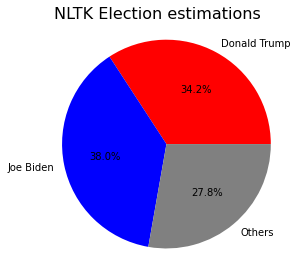

In [311]:
fig, axes = plt.subplots(figsize=(10,4))
axes.pie(data, labels=labels_nltk, autopct='%1.1f%%',radius=1.2,colors=['red','blue','gray'])
fig.suptitle("NLTK Election estimations",fontsize=16)
fig.savefig('Plots/NLTK_estimations_on_new_data.png')